<a href="https://colab.research.google.com/github/Aurorcys/ALPHASIG191/blob/main/AlphaSig191Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What Would You Like? AAPL


/tmp/ipython-input-3743554408.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, period=period)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3743554408.py:43: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  currentclose = float(data['Close'].iloc[i])
/tmp/ipython-input-3743554408.py:71: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  currentclose = float(data['Close'].iloc[i])


RESULTS: $12238.460067621
PERCENTAGE GROWTH: 22.384600676209992


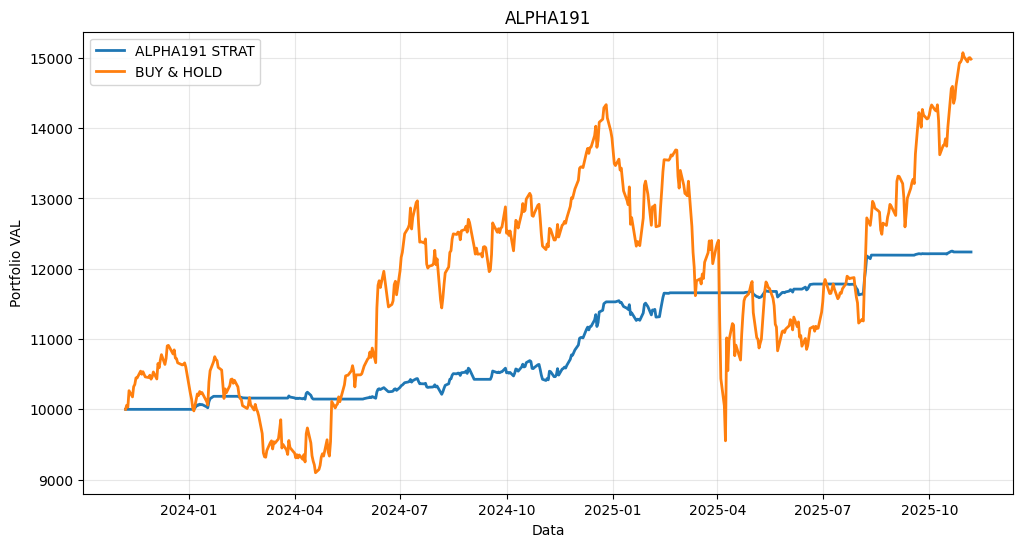

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def download(stock, period='2y'):
  data = yf.download(stock, period=period)
  return data

def alphafac(data, correlation=6):
  data['LogVol'] = np.log(data['Volume'])
  data['deltaLVOL'] = data['LogVol'].diff(1)

  data['IntradayReturn'] = (data['Close'] - data['Open']) / data['Open']

  data['RankingVOL'] = data['deltaLVOL'].rolling(6).rank()
  data['RankReturn'] = data['IntradayReturn'].rolling(6).rank()

  data['Alpha'] = -data['RankingVOL'].rolling(6).corr(data['RankReturn'])

  return data


cash = 10000
shares = 0
trades = []
portfolio = []
position = 0 #multiple positions are possible

#make it harder for a buy to happen
entrycondition = 0.5

base_risk = 0.3  # Base 30% of cash per strong signal
min_alpha = 0.3  # Ignore signals below this
max_alpha = 1.0


data = download(input('What Would You Like? '))

data = alphafac(data)

for i in range(len(data)):
  currentclose = float(data['Close'].iloc[i])
  if i % 5 == 0:
    alps = data['Alpha'].iloc[i]
    ab = alps
    if cash > 0 and ab > 0.2:
      signal_strength = (alps - min_alpha) / (max_alpha - min_alpha)
      signal_strength = max(0, min(1, signal_strength))
      cashusage = cash * base_risk * signal_strength
      sharestobuy = cashusage / currentclose
      shares += sharestobuy
      trades.append(f'BOUGHT ${sharestobuy} SHARES AT ${currentclose} PAYING ${cash*ab}')
      cash -= cashusage
    elif ab < -0.3 and shares > 0:
      cash_from_sale = shares * currentclose
      cash += cash_from_sale
      trades.append(f'SOLD ${shares} SHARES AT ${currentclose} GAINING ${cash_from_sale}')
      shares = 0
  if shares > 0:
    currentport = shares*currentclose + cash
  else:
    currentport = cash
  portfolio.append(currentport)


casb = 10000
sharesb = 0
portfoliob = []
for i in range(len(data)):
  currentclose = float(data['Close'].iloc[i])
  if casb > 0:
    sharesb = casb / currentclose
    casb = 0
  currentval = casb + sharesb*currentclose
  portfoliob.append(currentval)


print(f'RESULTS: ${portfolio[-1]}')
print(f'PERCENTAGE GROWTH: {(portfolio[-1] - 10000) / 10000 * 100}')


plt.figure(figsize=(12, 6))
plt.plot(data.index, portfolio, label='ALPHA191 STRAT', linewidth=2)
plt.plot(data.index, portfoliob, label='BUY & HOLD', linewidth = 2)
plt.title('ALPHA191')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylabel('Portfolio VAL')
plt.xlabel('Data')
plt.show()




